# Logistic Regression  

---------------

_Authors: Khal Makhoul, W.P.G.Peterson_   

## Project Guide
------------
- [Project Overview](#overview)
- [Introduction and Review](#intro)
- [Data Exploration](#data)
- [Coding Logistic Regression](#code)
- [Logistic Regression in sklearn](#sklearn)

<a id = "overview"></a>
## Project Overview  
-------------
#### EXPECTED TIME 3 HRS

This assignment will work through the definition of a Logistic Regression function in `Python`. After a summary of the equations that will be used, and a brief EDA of the "Titanic" data we will be using, you will be asked to define a number of functions which will, in sum, create a Logistic Regression.  
A demonstration of `sklearn`'s implementation of Logistic Regression will close the assignment.


You will be asked to code functions to do the following:
1. Implement the Logistic Regression Algorithm
    - Calculate the value of the sigmoid function
    - Calculate the gradient of the log-likelihood with respect to $w$
    - Sum the gradients of the log-likelihood with respect to $w$
2. Execute logistic regression, stopping after a particular iteration
3. Determine convergence of the logistic regression algorithm

**Motivation**: Logistic Regression offers a way to to create a fairly interpretable parametric model for binary classification.

**Problem**: Using Logistic Regression, predict whether or not a passenger survived the sinking of the Titanic.

**Data**: The data for today comes from [Kaggle's Titanic Data](https://www.kaggle.com/c/titanic/data). Please see above link for a more complete description of the data.


<a id = "intro"></a>

### Introduction and Review

In this week lectures, we derived all of the equations that will be used in this assignment.  

Recall that the likelihood for Logistic Regression is given by:

$$p(y_1,\ ...,\ y_n\ |\ x_1,\ ...,\ x_n,\ w)\ =\prod\limits_{i=1}^n\ \sigma_i(y_i \cdot w)$$  

For coding purposes, we need the expression for the gradient of the log-likelihood $\mathcal{L}$ with respect to $w$:


$$\nabla_w \mathcal{L} = \sum_{i = 1}^n (1 − \sigma_i(y_i \cdot w))\ y_i x_i$$  

Where: $$\sigma_i(y_i \cdot w) = \frac{e^{y_iX_i^Tw}}{1+e^{y_ix_i^Tw}}$$  


<a id = "data"></a>
### Data Exploration

This assignment will analyze data from the Titanic passenger manifest. Demographic and trip information for each passenger is coupled with whether or not they survived the disaster.

We start by examining the data as usual:

In [ ]:
# Import the necessary modules and sets a few plotting parameters for display

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Load the data into a `pandas` DataFrame object
tr_path = '../resource/asnlib/publicdata/train.csv'
titanic_df = pd.read_csv(tr_path)

# Examine head of df
titanic_df.head(7)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Load the data into a `pandas` DataFrame object
tr_path = './train.csv'
titanic_df = pd.read_csv(tr_path)

# Examine head of df
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
titanic_df.shape

(891, 12)

In [3]:
len(titanic_df.shape)

2

In [4]:
##NOTAR QUE: EN LA PROPIEDAD <.shape> EL NUMERO DE DIMENSIONES ES REGRESADO AL SER PASADA POR LA FUNCION <len()>
my_array = np.arange(10)
print(my_array.shape)
print(len(my_array.shape))

(10,)
1


#### Question 1
 
The exercise below requires dropping certain records / columns.  

The general rules followed below are:  

- If a column consists mostly of missing data, that column probably will not be of much use in prediction.  
- If a column has very few missing values, and enough records to build a model are complete, the records with missing values in that column may be cast out.  

The question statement below includes specific directions as to how to implement the above rules.

In [12]:
col_name = ['dimension 1','dimension 2','dimension 3']
new_df = pd.DataFrame(columns=col_name)
print(len(new_df))

0


In [13]:
for i in range(10):
    d1 = i+0.3
    d2 = i*0.5
    d3 = i**2
    new_df.loc[len(new_df)] = [d1, d2, d3]
new_df

,dimension 1,dimension 2,dimension 3
0,0.3,0.0,0.0
1,1.3,0.5,1.0
2,2.3,1.0,4.0
3,3.3,1.5,9.0
4,4.3,2.0,16.0
5,5.3,2.5,25.0
6,6.3,3.0,36.0
7,7.3,3.5,49.0
8,8.3,4.0,64.0
9,9.3,4.5,81.0


In [17]:
new_df[new_df['dimension 1']>6].index

Int64Index([6, 7, 8, 9], dtype='int64')

In [5]:
##REMOVE THIS CELL?

#Do not change this code

def miss_data(df):
    x = ['column_name','missing_data', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = (df[col].isnull().sum()/df[col].shape[0])*100

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    print(missing_data) 

In [6]:
miss_data(titanic_df)

    column_name missing_data  missing_in_percentage
0   PassengerId            0               0.000000
1      Survived            0               0.000000
2        Pclass            0               0.000000
3          Name            0               0.000000
4           Sex            0               0.000000
5           Age          177              19.865320
6         SibSp            0               0.000000
7         Parch            0               0.000000
8        Ticket            0               0.000000
9          Fare            0               0.000000
10        Cabin          687              77.104377
11     Embarked            2               0.224467


In [18]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
titanic_df['Embarked'].shape[0]

891

In [15]:
drop_df = titanic_df.drop(['Cabin'],axis=1)
drop_df = drop_df.dropna(subset=['Embarked'])
drop_df['Embarked'].isnull().sum()

0

In [42]:
drop_df.shape

(889, 11)

In [2]:
### GRADED

### 1. Drop all of the columns in `titanic_df` that are filled more than 50% with nulls.
### 2. If a column has fewer than 10 missing values, drop all of the records with missing data in that column.

### After performing the above operations, what is the shape of the DataFrame?
### Assign ints to the variables `row` and `cols` below corresponding to the *remaining* number of rows / columns.

### YOUR ANSWER BELOW
rows = 889
cols = 11

###
### YOUR CODE HERE
###


In [3]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 2

In [19]:
titanic_df['Age'].isnull().sum()

177

In [20]:
### GRADED
### How many values are missing from the column 'Age?'

### Assign your answer to the variable ans1 as an integer.
### YOUR ANSWER BELOW

ans1 = 177
###
### YOUR CODE HERE
###


In [21]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Given the fairly large number of values missing in the column "Age", and given that the age of a passenger is likely connected with the chances of survival of the passenger, we will create an educated guess for the missing missing values of the passengers' ages. In other words, we will impute the ages using a $k$-Nearest-Neighbor algorithm.

Note: In imputing values for "age", becasue we want to predict the chances of survival of each passenger, the feature "`survival`" will be excluded from the $X$ matrix.

#### KNeighborsRegressor in `sklearn`
Because `sklearn` automatically converts all data to floats before fitting models, it is necessary to encode any categorical features will be using as dummy variables:

In [4]:
### Drop irrelevant features from the dataframe
titanic_df.drop(['Ticket','Cabin', 'PassengerId', 'Name'], axis=1, inplace=True)
titanic_df = titanic_df.loc[titanic_df['Embarked'].notnull(),:]

### Drop "Survived" for purposes of KNN imputation:
y_target = titanic_df.Survived
titanic_knn = titanic_df.drop(['Survived'], axis = 1)  
titanic_knn.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [5]:
### Adding dummy variables for categorical variables
to_dummy = ['Sex','Embarked']
titanic_knn = pd.get_dummies(titanic_knn, prefix = to_dummy, columns = to_dummy, drop_first = True)

titanic_knn.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [6]:
### Splitting data - on whether or not "Age" is specified.

# Training data -- "Age" Not null; "Age" as target
train = titanic_knn[titanic_knn.Age.notnull()]
X_train = train.drop(['Age'], axis = 1)
y_train = train.Age


# Data to impute, -- Where Age is null; Remove completely-null "Age" column.
impute = titanic_knn[titanic_knn.Age.isnull()].drop(['Age'], axis = 1)
print("Data to Impute")
print(impute.head(3))

# import algorithm
from sklearn.neighbors import KNeighborsRegressor

# Instantiate
knr = KNeighborsRegressor()

# Fit
knr.fit(X_train, y_train)

# Create Predictions
imputed_ages = knr.predict(impute)

# Add to Df
impute['Age'] = imputed_ages
print("\nImputed Ages")
print(impute.head(3))

# Re-combine dataframes
titanic_imputed = pd.concat([train, impute], sort = False, axis = 0)

# Return to original order - to match back up with "Survived"
titanic_imputed.sort_index(inplace = True)
print("Shape before imputation:", titanic_knn.shape)
print("Shape with imputed values:", titanic_imputed.shape)
titanic_imputed.head(7)

Data to Impute
    Pclass  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
5        3      0      0   8.4583         1           1           0
17       2      0      0  13.0000         1           0           1
19       3      0      0   7.2250         0           0           0

Imputed Ages
    Pclass  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S   Age
5        3      0      0   8.4583         1           1           0  47.2
17       2      0      0  13.0000         1           0           1  25.6
19       3      0      0   7.2250         0           0           0  23.0
Shape before imputation: (889, 8)
Shape with imputed values: (889, 8)


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
5,3,47.2,0,0,8.4583,1,1,0
6,1,54.0,0,0,51.8625,1,0,1


It would be appropriate to spend more time taking care with the imputation of age. In fact, missing data can introduce a substantial amount of bias, make the handling and analysis of the data more arduous, and create reductions in efficiency. For brevity's sake, this will not be done here.

#### Brief EDA

First, let's look at tabulations of categorical features:

In [25]:
import itertools
# Lists of categorical v. numeric features
categorical = ['Pclass','Sex','Embarked']
numeric = ['Age','SibSp','Parch','Fare']

# Create all pairs of categorical variables and look at the distributions
cat_combos = list(itertools.combinations(categorical, 2))
print("All combinations of categorical variables: \n",cat_combos, "\n")
for row, col in cat_combos:
    print("Row Percents: \n",pd.crosstab(titanic_df[row], titanic_df[col], normalize="index"), "\n")
    print("Column Percents: \n", pd.crosstab(titanic_df[row], titanic_df[col], normalize="columns"),"\n---------------\n")

All combinations of categorical variables: 
 [('Pclass', 'Sex'), ('Pclass', 'Embarked'), ('Sex', 'Embarked')] 

Row Percents: 
 Sex       female      male
Pclass                    
1       0.429907  0.570093
2       0.413043  0.586957
3       0.293279  0.706721 

Column Percents: 
 Sex       female      male
Pclass                    
1       0.294872  0.211438
2       0.243590  0.187175
3       0.461538  0.601386 
---------------

Row Percents: 
 Embarked         C         Q         S
Pclass                                
1         0.397196  0.009346  0.593458
2         0.092391  0.016304  0.891304
3         0.134420  0.146640  0.718941 

Column Percents: 
 Embarked         C         Q         S
Pclass                                
1         0.505952  0.025974  0.197205
2         0.101190  0.038961  0.254658
3         0.392857  0.935065  0.548137 
---------------

Row Percents: 
 Embarked         C         Q         S
Sex                                   
female    0.233974  0.11

**For the numeric variables, we simply created a correlation heatmap**

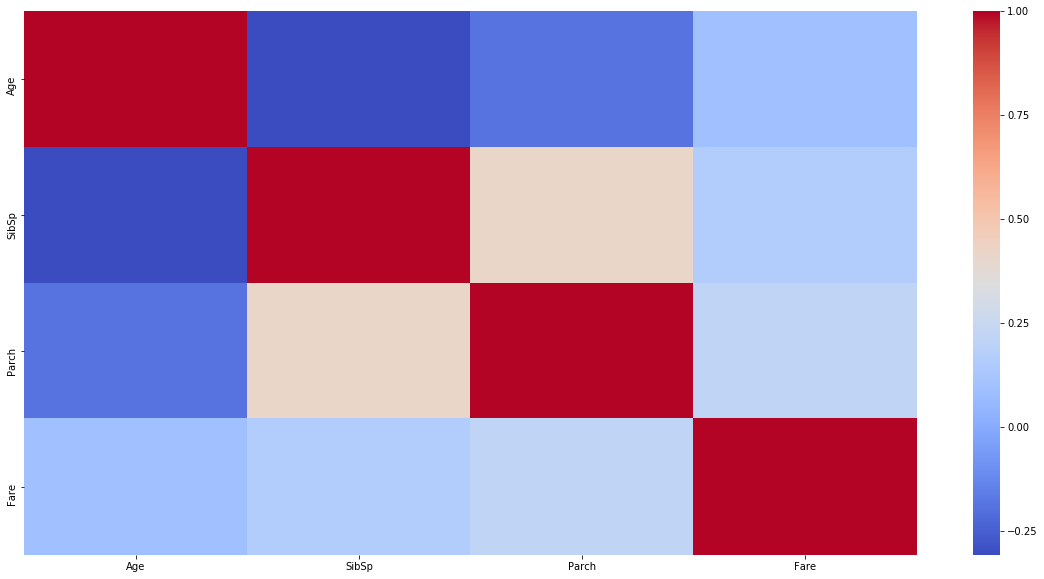

In [26]:
import seaborn as sns
sns.heatmap(titanic_df[numeric].corr(), cmap = "coolwarm");

#### Question 3

In [7]:
### GRADED
### True or False:
### Other than the autocorrelation, two of the above variables in the heatmap
### have a correlation that is greater than 0.5?

### Assign your answer as a boolean value ans3
### YOUR ANSWER BELOW

ans3 = False
###
### YOUR CODE HERE
###


In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "code"></a>
### Coding Logistic Regression

The first function we will be coding will perform the pre-processing of our data. 

Define a function called `prepare_data` that takes, as arguments, `numpy` arrays `input_x` and `target_y`.
Your function should perform the following steps:

**First**: Ensure that the `input_x` and `target_y` arrays  have the observations as rows, and features as columns. In particular:
- `input_x` should be a matrix with $n$ rows and $d$ columns. Where $n>d$
- `target_y` should be a 1-dimensional numpy array of length $n$.  

**Second**: A column of ones must be added to `input_x` matrix, increasing its dimensions to $ n \times d+1$.  

**Third**: Ensure that `target_y` has all values encoded as 1 and -1, **not** 1 and 0.  

**Fourth**: The initial  weights must be created as a zero vector of length $d+1$ (Hint: look at the function `np.zeros`)

Your function should return three arrays `return prepared_x, prepared_y, initial_w`, each created following the steps above.

The example below shows how to return multiple items within the same function.

In [29]:
def ex_func(): return 1,2,3


z = ex_func()
a,b,c = ex_func()

print("a:", a,"b:",b,"c:",c,"z:",z)

a: 1 b: 2 c: 3 z: (1, 2, 3)


#### Question 4

In [9]:
def prepare_data(input_x, target_y):
    ##Data Validation: X_nxp, Where n>>p & y_nx1 ...
    if input_x.shape[0] < input_x.shape[1]:
        input_x = input_x.T
    
    if len(target_y.shape) > 1:
        if min(target_y.shape) == 1:
            target_y.reshape(-1) #Reshape target_y into a vector
        else:
            print('Vector target_y has wrong dimensions')
        
    ##Append one's column in X for Intercepto Estimation ...
    betta = np.ones(input_x.shape[0],dtype = int).T
    input_x = np.insert(input_x, 0, betta, axis = 1)
    
    ##Replace any zero value in target_y vector with -1.0 ...
    target_y[target_y == 0] = -1
    
    ##Generate initial weights ...
    initial_w = np.zeros(input_x.shape[1])
    
    return input_x, target_y, initial_w 
    

In [50]:
x = np.array([[1,2,3,4],[11,12,13,14]])
y = np.array([1,0,1,1])
x,y,w = prepare_data(x,y)

print(x) #--> array([[ 1,  1, 11],
#                     [ 1,  2, 12],
#                     [ 1,  3, 13],
#                     [ 1,  4, 14]])

print(y) #--> array([1, -1, 1, 1])

print(w) #--> array([0., 0., 0.])

[[ 1  1 11]
 [ 1  2 12]
 [ 1  3 13]
 [ 1  4 14]]
[ 1 -1  1  1]
[0. 0. 0.]


In [10]:
### GRADED
### Define `prepare_data` using the instructions given above
### YOUR ANSWER BELOW

def prepare_data(input_x, target_y):
    """
    Confirm dimensions of x and y, transpose if appropriate;
    Add column of ones to x;
    Ensure y consists of 1's and -1's;
    Create weights array of all 0s
    
    Return X, y, and weights.
    
    Arguments:
        input_x - a numpy array 
        target_y - a numpy array
        
    Returns:
        prepared_x -- a 2-d numpy array; first column consists of 1's,
            more rows than columns
        prepared_y -- a numpy array consisting only of 1s and -1s
        initial_w -- a 1-d numpy array consisting of "d+1" 0s, where
            "d+1" is the number of columns in "prepared_x"
        
    Example:
        x = np.array([[1,2,3,4],[11,12,13,14]])
        y = np.array([1,0,1,1])
        x,y,w = prepare_data(x,y)
        
        print(x) #--> array([[ 1,  1, 11],
                            [ 1,  2, 12],
                            [ 1,  3, 13],
                            [ 1,  4, 14]])
                            
        print(y) #--> array([1, -1, 1, 1])
        
        print(w) #--> array([0., 0., 0.])
        
    Assumptions:
        Assume that there are more observations than features in `input_x`
    """ 
    ##Data Validation: X_nxp, Where n>>p & y_nx1 ...
    if input_x.shape[0] < input_x.shape[1]:
        input_x = input_x.T
    
    if len(target_y.shape) > 1:
        if min(target_y.shape) == 1:
            target_y.reshape(-1) #Reshape target_y into a vector
        else:
            print('Vector target_y has wrong dimensions')
        
    ##Append one's column in X for Intercepto Estimation ...
    betta = np.ones(input_x.shape[0],dtype = int).T
    input_x = np.insert(input_x, 0, betta, axis = 1)
    
    ##Replace any zero value in target_y vector with -1.0 ...
    target_y[target_y == 0] = -1
    
    ##Generate initial weights ...
    initial_w = np.zeros(input_x.shape[1])
    
    return input_x, target_y, initial_w 
###
### YOUR CODE HERE
###


In [52]:
x = np.array([[1,2,3,4],[11,12,13,14]])
y = np.array([1,0,1,1])
#y = np.array([[1],[0],[1],[1]])
x,y,w = prepare_data(x,y)

In [53]:
y.reshape(-1)

array([ 1, -1,  1,  1])

In [11]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 5
Next, we will define a function to calculate the value of the sigmoid. 

Recall that the equation for the sigmoid is given by:
$$\sigma_i(y_i \cdot w) = \frac{e^{y_iX_i^Tw}}{1+e^{y_ix_i^Tw}}$$  

Define a function called `sigmoid_single` that takes, as arguments, the arrays $x_i$, $y_i$, and $w$ and returns the sigmoid, as a float, with value between 0 and 1.  

Hint: First calculate $e^{y_ix_i^Tw}$; use `np.exp()`.  

Look closely at the examples below.  
$e^{y_ix_i^Tw}$ will evaluate to $np.inf$ if $y_ix_i^Tw$ is greater than ~709.782. In this case, a `"1"` should be returned by the function.

In [55]:
def sigmoid_single(x, y, w):
    '''Arguments:
        x - a vector of length d
        y - either 1, or -1
        w - a vector of length d'''
    e = np.exp(y * np.matmul(x.T,w))
    
    ##Validate e is not +infinity ...
    if e == np.inf:
        return 1
    else:
        return e/(1 + e)
    

In [56]:
x = np.array([23.0,75])
y = -1
w = np.array([2,-.5])
sig = sigmoid_single(x, y, w)

print(sig) #--> 0.0002034269780552065

0.0002034269780552065


In [57]:
x2 = np.array([ 1. , 22., 0. , 1. , 7.25 , 0. , 3. , 1. , 1.])
w2 = np.array([ -10.45 , -376.7215 , -0.85, -10.5 , 212.425475 , -1.1, -36.25 , -17.95 , -7.1])
y2 = -1
sig2 = sigmoid_single(x2,y2,w2)

print(sig2) #--> 1

1


In [12]:
### GRADED
### Follow the directions given above
### YOUR ANSWER BELOW
def sigmoid_single(x, y, w):
    """
    Obtain the value of a Sigmoid using training data.
    
    Arguments:
        x - a vector of length d
        y - either 1, or -1
        w - a vector of length d
    
    Example:
        x = np.array([23.0,75])
        y = -1
        w = np.array([2,-.5])
        sig = sigmoid_single(x, y, w)
        
        print(sig) #--> 0.0002034269780552065
        
        x2 = np.array([ 1. , 22., 0. , 1. , 7.25 , 0. , 3. , 1. , 1.])
        w2 = np.array([ -10.45 , -376.7215 , -0.85, -10.5 , 212.425475 , -1.1, -36.25 , -17.95 , -7.1])
        y2 = -1
        sig2 = sigmoid_single(x2,y2,w2)
        
        print(sig2) #--> 1
    """
    e = np.exp(y * np.matmul(x.T,w))
    
    ##Validate e is not +infinity ...
    if e == np.inf:
        return 1
    else:
        return e/(1 + e)
    
###
### YOUR CODE HERE
###


In [59]:
x2 = np.array([ 1. , 22., 0. , 1. , 7.25 , 0. , 3. , 1. , 1.])
w2 = np.array([ -10.45 , -376.7215 , -0.85, -10.5 , 212.425475 , -1.1, -36.25 , -17.95 , -7.1])

In [60]:
x2.dot(w2)

-6902.53830625

In [62]:
x2.T@w2

-6902.53830625

In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 6
With the sigmoid, $\sigma_i(y_i \cdot w)$ defined above, we can define the rest of the function that is summed to calculate the gradient of the log-likelihood.   

Define a function named `to_sum` that takes, as input,  two vectors of length d, $x_i$ and $w_i$, and the paramenter $y$ equal to either 1, or -1. Your function will eventually be summed to find the gradient of the log-likelihood. 
Your function should return the value of $(1-\sigma_i(y_i\cdot w))y_ix_i$.

In [64]:
def to_sum(x,y,w):
    dsig = 1 - sigmoid_single(x,y,w)
    
    return dsig * y * x

In [65]:
x = np.array([23.0,75])
y = -1
w = np.array([.1,-.2])
print(to_sum(x,y,w)) # --> array([-7.01756737e-05, -2.28833719e-04])

[-7.01756737e-05 -2.28833719e-04]


In [14]:
### GRADED
### YOUR ANSWER BELOW
def to_sum(x,y,w):
    """
    Obtain the value of the function that will eventually be summed to 
    find the gradient of the log-likelihood.
    
    Arguments:
        x - a vector of length d
        y - either 1, or -1
        w - a vector of length d
        
    Example:
        x = np.array([23.0,75])
        y = -1
        w = np.array([.1,-.2])
        print(to_sum(x,y,w)) # --> array([-7.01756737e-05, -2.28833719e-04])
    
    """
    dsig = 1 - sigmoid_single(x,y,w)
    return dsig * y * x

    # Use function created above, multiply by x and y arrays.
###
### YOUR CODE HERE
###


In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 7
Finally, code a function called `sum_all` that will obtain and return the gradient of the log-likelihood.  
Your function shoudl take the pre-processed matricies corresponding to `X`, `y`, and the weights,  and should return
$\sum_{i = 1}^n (1 − \sigma_i(y_i \cdot w))\ y_i x_i$

In [70]:
def sum_all(x_input, y_target, w):
    ##Initialize Summation ...
    Sigma = np.zeros(w.shape[0])
    
    ##Getting a single observation and its label ...
    for x, y in zip(x_input, y_target):
        Sigma += to_sum(x,y,w)
        
    return Sigma        

In [71]:
x = np.array([[1,22,7.25],[1,38,71.2833]])
y = np.array([-1,1])
w = np.array([.1,-.2, .5])
print(sum_all(x,y,w)) #--> array([-0.33737816, -7.42231958, -2.44599168])

[-0.33737816 -7.42231958 -2.44599168]


In [16]:
### GRADED
### Follow instructions above
### YOUR ANSWER BELOW
def sum_all(x_input, y_target, w):
    """
    Obtain and return the gradient of the log-likelihood
    
    Arguments:
        x_input - *preprocessed* an array of shape n-by-d
        y_target - *preprocessed* a vector of length n
        w - a vector of length d
        
    Example:
        x = np.array([[1,22,7.25],[1,38,71.2833]])
        y = np.array([-1,1])
        w = np.array([.1,-.2, .5])
        print(sum_all(x,y,w)) #--> array([-0.33737816, -7.42231958, -2.44599168]) 
    """
    ##Initialize Summation ...
    Sigma = np.zeros(w.shape[0])
    
    ##Getting a single observation and its label ...
    for x, y in zip(x_input, y_target):
        Sigma += to_sum(x,y,w)
        
    return Sigma
###
### YOUR CODE HERE
###


In [17]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 8
Code a function called `update_w`, that performs a single-step of gradient descent for calculating the Logistic Regression weights.

Your function should take, as inputs, the pre-processed arrays `input_x` and `target_y`, the current weights $w$ and $\eta$, a positive float with value close to zero.
The function `update_w` should return:
$$w_i + \eta \sum_{i = 1}^n (1 − \sigma_i(y_i \cdot w_i))\ y_i x_i$$

In [74]:
def update_w(x_input, y_target, w, eta):
    
    return w + eta * sum_all(x_input,y_target,w)

In [75]:
x = np.array([[1,22,7.25],[1,38,71.2833]])
y = np.array([-1,1])
w = np.array([.1,-.2, .5])
eta = .1

print(update_w(x,y,w, eta)) #--> array([ 0.06626218, -0.94223196,  0.25540083])

[ 0.06626218 -0.94223196  0.25540083]


In [18]:
### GRADED
### YOUR ANSWER BELOW
def update_w(x_input, y_target, w, eta):
    """Obtain and return updated Logistic Regression weights
    
    Arguments:
        x_input - *preprocessed* an array of shape n-by-d
        y_target - *preprocessed* a vector of length n
        w - a vector of length d
        eta - a float, positive, close to 0
        
    Example:
        x = np.array([[1,22,7.25],[1,38,71.2833]])
        y = np.array([-1,1])
        w = np.array([.1,-.2, .5])
        eta = .1
        
        print(update_w(x,y,w, eta)) #--> array([ 0.06626218, -0.94223196,  0.25540083])
"""
    return w + eta * sum_all(x_input,y_target,w)
###
### YOUR CODE HERE
###


In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 9
Next, create a function called `fixed_iteration` which will perform gradient descent, calculating the Logistic Regression weights for a specified number of steps.  


Your function should take *Un-preprocessed* `x`- and `y`- matricies, an $\eta$ parameter, a positive float close to 0, `steps`, an integer defining the number of steps.

The function `fixed_iteration` should return $w_{steps}$, the weights calculated from 'steps' number of steps of gradient descent, where 

$$w_{i+1} = w_i + \eta \sum_{i = 1}^n (1 − \sigma_i(y_i \cdot w_i))\ y_i x_i$$

NB: Initial weights ($w_0$) should all be 0's like are returned from the `prepare_data` function.

In [82]:
def fixed_iteration(x_input, y_target, eta, steps):
    
    ##Preprocess data and get initial weights ...
    X, y, w = prepare_data(x_input, y_target)
    
    ##Update weights N steps ...
    for step in range(steps):
        w = update_w(X, y, w, eta)
    
    return w

In [83]:
x = np.array([[22,7.25],[38,71.2833],[26,7.925],[35,53.1]])
y = np.array([-1,1,1,1])
eta = .1
steps = 100

print(fixed_iteration(x,y, eta, steps)) #--> np.array([-0.9742495,  -0.41389924, 6.8199374 ])

[-0.9742495  -0.41389924  6.8199374 ]


In [20]:
### GRADED
### Follow the directions given above
### YOUR ANSWER BELOW

def fixed_iteration(x_input, y_target, eta, steps):
    
    """
    Return weights calculated from 'steps' number of steps of gradient descent.
    
    Arguments:
        x_input - *NOT-preprocessed* an array
        y_target - *NOT-preprocessed* a vector of length n
        eta - a float, positve, close to 0
        steps - an int
        
    Example:
        x = np.array([[22,7.25],[38,71.2833],[26,7.925],[35,53.1]])
        y = np.array([-1,1,1,1])
        eta = .1
        steps = 100
        
        print(fixed_iteration(x,y, eta, steps)) #--> np.array([-0.9742495,  -0.41389924, 6.8199374 ])
    """
    ##Preprocess data and get initial weights ...
    X, y, w = prepare_data(x_input, y_target)
    
    ##Update weights N steps ...
    for step in range(steps):
        w = update_w(X, y, w, eta)
    
    return w
###
### YOUR CODE HERE
###


In [21]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 10
For the final function, we will create prediction for out-of-sample data.  

Code a function called "`predict`" that accept, as inputs, an **un-preprocessed** numpy array `input_x` with the observations and the array `weights` containing the weight. Your function should return a label prediction of `input_x` observations; either -1 or 1 (integers).  

**Hint** *FIRST* preprocess `input_x`. Then; If `input_x`$^T\cdot w > 0$  predict 1. Otherwise, predict -1.


In [86]:
def predict(x_input, weights):
    ##NOTE: x_input - *NOT-preprocessed* a vector of length d-1
    x_augmented = np.insert(x_input, 0, 1)
    
    ##Label Prediction y` = 1, if (x^T * w) > 0 ...
    y_hat = np.matmul(x_augmented.T,weights)
    
    if y_hat > 0:
        return 1
    else:
        return -1
    

In [87]:
Xs = np.array([[22,7.25],[38,71.2833],[26,7.925],[35,53.1]])
weights = np.array([0,1,-1])

for X in Xs:
    print(predict(X,weights))
#     #-->     1
#             -1
#              1
#             -1

1
-1
1
-1


In [22]:
### GRADED
### Follow the directions given above
### YOUR ANSWER BELOW
def predict(x_input, weights):
    """
    Return the label prediction, 1 or -1 (an integer), for the given x_input and LR weights.
    
    Arguments:
        x_input - *NOT-preprocessed* a vector of length d-1
        weights - a vector of length d
               
    Example:
        Xs = np.array([[22,7.25],[38,71.2833],[26,7.925],[35,53.1]])
        weights = np.array([0,1,-1])
        
        for X in Xs:
            print(predict(X,weights))
            #-->     1
                    -1
                     1
                    -1
    """
    ##NOTE: x_input - *NOT-preprocessed* a vector of length d-1
    x_augmented = np.insert(x_input, 0, 1)
    
    ##Label Prediction y` = 1, if (x^T * w) > 0 ...
    y_hat = np.matmul(x_augmented.T,weights)
    
    if y_hat > 0:
        return 1
    else:
        return -1
###
### YOUR CODE HERE
###


In [23]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "sklearn"></a>
### Logistic Regression in `sklearn`

The following cells will demonstrate Logistic Regression using `sklearn`, and compare the custom Logistic Regression built in the previous functions to `sklearn's`

For a more complete description of how to perfor Logistic Regression in `sklearn` you can visit [Logistic Regression in `sklearn` - Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
lr = LogisticRegression()

lr.fit(titanic_imputed, y_target)

# Create sklearn's predictions
sk_pred = lr.predict(titanic_imputed)

print(lr.intercept_)
print(lr.coef_)

[4.07454295]
[[-0.88163975 -0.03085442 -0.29522779 -0.0771424   0.00431432 -2.40900801
   0.08754859 -0.21682785]]


If the above functions are correctly defined, the below cell should work.
Because the regularization is implemented in the `sklearn` instantiation, the particular coefficients will be very different, however the signs should be mostly the same. Make sure that custom version coded above has a similar result to the one given by `sklearn`.

**FOR FASTER GRADING TRY COMMENTING OUT THE BELOW CELLS**

In [31]:
titanic_imputed.values.shape

(889, 8)

In [32]:
y_target.values.shape

(889,)

In [45]:
%time
# This cell may take awhile
logr_w = fixed_iteration(titanic_imputed.values, y_target.values, .01, 100)

Wall time: 0 ns


In [46]:
logr_w

array([ -1.04324874, -50.47489277, -24.22255619, -87.68857616,
       -25.58676257,  49.43086102, -88.89344389,   7.8406932 ,
       -21.37851355])

In [42]:
%time
# # This cell may take awhile
wt = fixed_iteration(titanic_imputed.values, y_target.values, .05, 12000)

print(wt)

cust_preds = np.array([predict(x,wt) for x in titanic_imputed.values])
cust_preds[cust_preds == -1] = 0

Wall time: 0 ns
[  6853.75182849   -831.23291018   -304.24383135  -2919.42190116
  -1291.68658091    218.83793151 -14297.98042097     66.49415552
    428.14909561]


In [37]:
# y_hats = np.array([predict(x,logr_w) for x in titanic_imputed.values])
# y_hats

In [39]:
print("sklearn:")
print(classification_report(y_target, sk_pred))

print("Custom:")
print(classification_report(y_target, cust_preds))

sklearn:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       549
           0       0.00      0.00      0.00         0
           1       0.77      0.69      0.73       340

   micro avg       0.26      0.26      0.26       889
   macro avg       0.26      0.23      0.24       889
weighted avg       0.30      0.26      0.28       889

Custom:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       549
           0       0.00      0.00      0.00         0
           1       0.82      0.41      0.54       340

   micro avg       0.16      0.16      0.16       889
   macro avg       0.27      0.14      0.18       889
weighted avg       0.31      0.16      0.21       889

